In [1]:
!pip install "torch==1.4" "torchvision==0.5.0"

     |████████████████████████████████| 753.4MB 21kB/s 
     |████████████████████████████████| 4.0MB 2.6MB/s 
  Found existing installation: torch 1.5.0+cu101
    Uninstalling torch-1.5.0+cu101:
      Successfully uninstalled torch-1.5.0+cu101
  Found existing installation: torchvision 0.6.0+cu101
    Uninstalling torchvision-0.6.0+cu101:
      Successfully uninstalled torchvision-0.6.0+cu101


In [0]:
from fastai import *

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
%cd "/content/drive/My Drive/automatic-asset-classification"

/content/drive/My Drive/automatic-asset-classification


In [0]:
from fastai.vision import *

In [6]:
image_path = "/content/drive/My Drive/automatic-asset-classification/data/final_dataset"
np.random.seed(3333)
torch.manual_seed(3333)

size = 224
batchsize = 32

tfms = get_transforms(do_flip = True)
data = ImageDataBunch.from_folder(image_path, valid_pct = 0.2, size=size,ds_tfms=tfms, bs = batchsize
                                 ).normalize(imagenet_stats)

print("imported")

imported


In [9]:
len(data.train_ds), len(data.valid_ds)

(444, 110)

In [15]:
data.classes

['embankment', 'flood_gate', 'flood_wall', 'outfall', 'reservoir', 'weir']

## Resnet Model

In [22]:
learner = cnn_learner(data, models.resnet34, metrics=[accuracy,error_rate])

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [23]:
learner.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,2.744302,0.824793,0.727273,0.272727,03:40
1,1.786203,0.489035,0.854545,0.145455,00:21
2,1.283142,0.480490,0.854545,0.145455,00:14
3,1.010524,0.454880,0.845455,0.154545,00:14
4,0.818900,0.435870,0.854545,0.145455,00:14


In [24]:
learner.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 3.31E-06
Min loss divided by 10: 6.31E-08


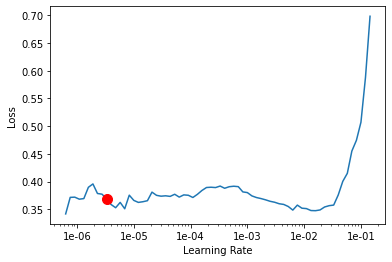

In [25]:
learner.recorder.plot(suggestion=True)

In [28]:
learner.fit_one_cycle(15, tot_epochs=20, start_epoch = 0, max_lr = 5e-03)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.460025,0.448867,0.836364,0.163636,00:14
1,0.387016,0.416397,0.854545,0.145455,00:14
2,0.357668,0.396120,0.872727,0.127273,00:14
3,0.314791,0.443823,0.872727,0.127273,00:14
4,0.293267,0.637150,0.836364,0.163636,00:14
5,0.293126,0.596924,0.845455,0.154545,00:13
6,0.313611,0.583686,0.854545,0.145455,00:14
7,0.312772,0.727582,0.827273,0.172727,00:14
8,0.287902,0.671156,0.845455,0.154545,00:14
9,0.271781,0.958371,0.854545,0.145455,00:14


In [29]:
learner.unfreeze()
learner.fit_one_cycle(20, start_epoch=15, tot_epochs=20, max_lr=slice(1e-05,5e-03))

epoch,train_loss,valid_loss,accuracy,error_rate,time
15,0.092051,0.534891,0.872727,0.127273,00:15
16,0.113840,0.458479,0.890909,0.109091,00:14
17,0.111699,0.425195,0.890909,0.109091,00:14
18,0.104517,0.417203,0.890909,0.109091,00:14
19,0.100119,0.406086,0.900000,0.100000,00:14


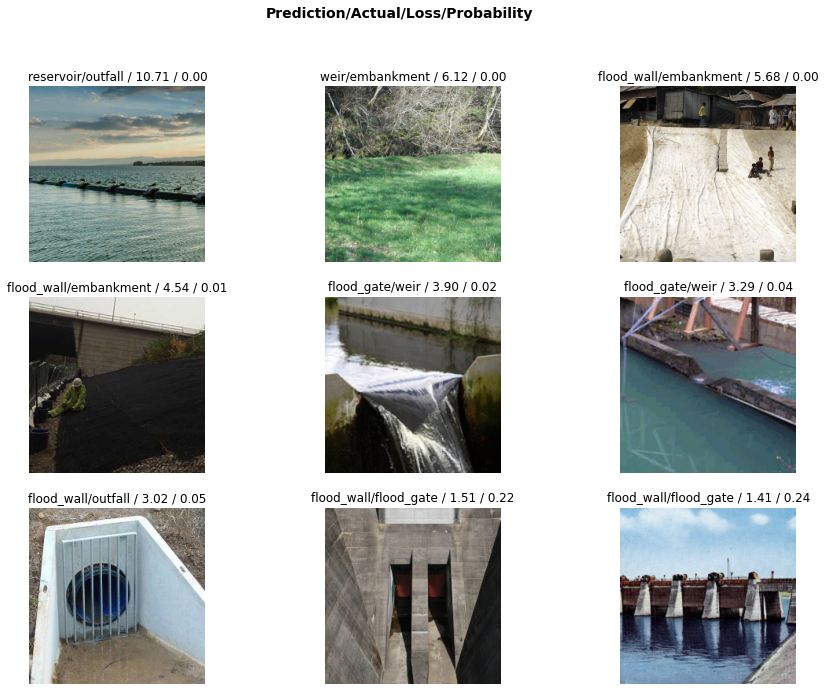

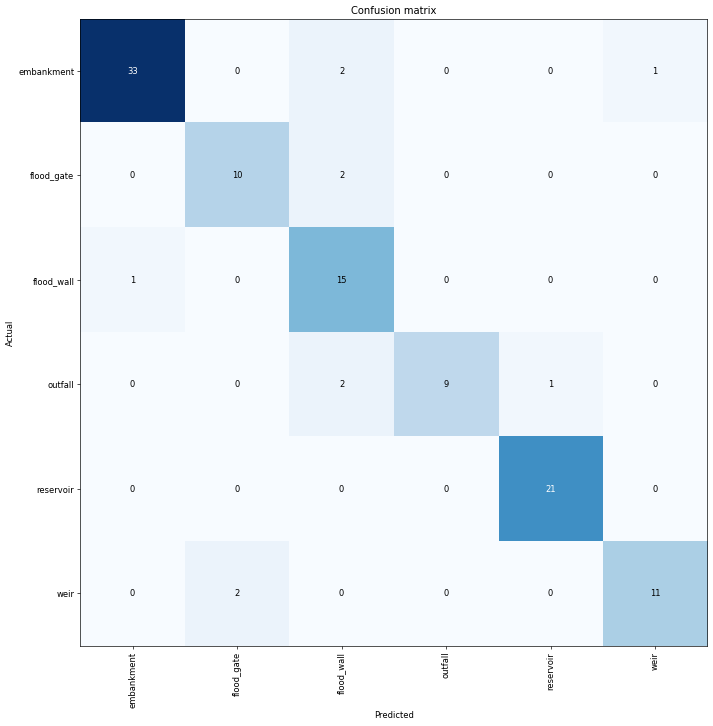

In [31]:
interp = ClassificationInterpretation.from_learner(learner)
losses,idxs = interp.top_losses()
#len(data.valid_ds)==len(losses)==len(idxs)
#validation analysis
interp.plot_top_losses(9, figsize=(15,11))
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)